# Logistic Regresssion

## Load X,y data from NPZ

Using the function added to *mylib.py* file, it's now easy to grab data and X/y vectors ready to be used for model training and tuning

In [1]:
# Run content of mylib.py file
%run mylib.py

# Load data from NPZ file
#data=loadNpz()
(data, X, y)=loadXy()

Loading 'train' set
  loading  data
     shape: (281, 299, 299, 3) - dtype: float64
  loading  features
     shape: (281, 2048) - dtype: float64
  loading  filenames
     shape: (281,) - dtype: <U48
  loading  labels
     shape: (281,) - dtype: int32


Loading 'test' set
  loading  data
     shape: (50, 299, 299, 3) - dtype: float64
  loading  features
     shape: (50, 2048) - dtype: float64
  loading  filenames
     shape: (50,) - dtype: <U30
  loading  labels
     shape: (50,) - dtype: int32


Loading 'valid' set
  loading  data
     shape: (139, 299, 299, 3) - dtype: float64
  loading  features
     shape: (139, 2048) - dtype: float64
  loading  filenames
     shape: (139,) - dtype: <U30
  loading  labels
     shape: (139,) - dtype: int32


building 'trainX' set
  building  data
     shape: (420, 299, 299, 3) - dtype: float64
  building  features
     shape: (420, 2048) - dtype: float64
  building  filenames
     shape: (420,) - dtype: <U48
  building  labels
     shape: (420,) - dt

## Evaluate without any hyperparameters tuning

To do so, I will simply create a LogisticRegression estimator object using default parameters, fit it, and evaluate it agains the *test* dataset.

> Note: I've explicitly set some hyperparameters to avoid warnings about default values that will be changed in the future.


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Cross Validation K-Fold dimension
CV=5

# Create LogisticRegression object with default values
lr=LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=1000)

# Set grid parameters for regularization strenght tuning
# Not that for this first run, we do no tune this param, so I set it to default=1.0
grid_param={
    'C': [1.0]
}

grid_lr=GridSearchCV(lr, grid_param, cv=CV, refit=True, return_train_score=True, verbose=True, n_jobs=-1, iid=True)

grid_lr.fit(X['trainX'], y['trainX'])

accuracy_lr=grid_lr.score(X['test'], y['test'])*100

print("\n")
print("LogisticRegression score : {:.1f}%".format(accuracy_lr))


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.8s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.6s finished




LogisticRegression score : 96.0%


## Do some regularization strenght tuning with GridSearchCV

In [128]:

# Set C parameters to a range of values
grid_param={
    'C': np.logspace(-7, 1, num=50),
}

grid_lr=GridSearchCV(lr, grid_param, cv=CV, refit=True, return_train_score=True, verbose=True, n_jobs=-1, iid=True)

grid_lr.fit(X['trainX'], y['trainX'])




Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.00000e-07, 1.45635e-07, 2.12095e-07, 3.08884e-07, 4.49843e-07,
       6.55129e-07, 9.54095e-07, 1.38950e-06, 2.02359e-06, 2.94705e-06,
       4.29193e-06, 6.25055e-06, 9.10298e-06, 1.32571e-05, 1.93070e-05,
       2.81177e-05, 4.09492e-05, 5.96362e-05, 8.68511e-05, 1.26486e... 1.04811e+00, 1.52642e+00,
       2.22300e+00, 3.23746e+00, 4.71487e+00, 6.86649e+00, 1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [129]:
import pandas as pd

columns=['param_C', 'mean_test_score', 'std_test_score', 'mean_train_score']
results_df=pd.DataFrame(grid_lr.cv_results_).sort_values('mean_test_score', ascending=False)[columns]

results_df.head()

,param_C,mean_test_score,std_test_score,mean_train_score
49,10,0.935714,0.017326,1.000000
44,1.52642,0.935714,0.011617,1.000000
32,0.0167683,0.935714,0.016470,0.984530
33,0.0244205,0.935714,0.016470,0.987503
37,0.109854,0.935714,0.011145,1.000000


In [130]:
best_lr=grid_lr.best_estimator_

best_accuracy_lr=best_lr.score(X['test'], y['test'])*100

print("LogisticRegression score : {:.1f}%".format(best_accuracy_lr))



LogisticRegression score : 96.0%


In [131]:
saveModel(best_lr, 'logistic')

Saving model logistic to model-logistic.sav


## Compute probability

Image index selected from the 'test' dataset [0, 3, 10, 15, 43, 60, 65, 72, 87, 101]


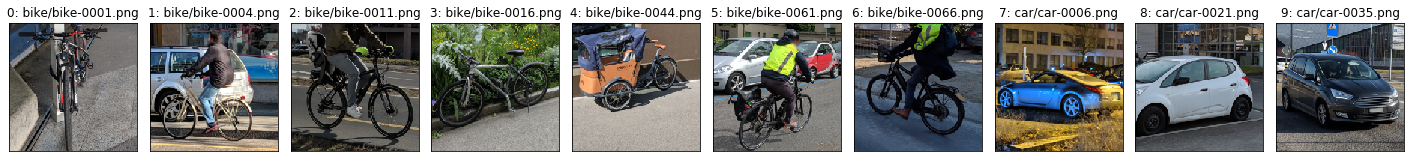

,bike,car,motorcycle,other,truck,van,labels
0,0.969539,0.005763,0.004190,0.011961,0.004997,0.003550,bike/bike-0001.png
1,0.825294,0.100211,0.007944,0.013497,0.006510,0.046544,bike/bike-0004.png
2,0.983913,0.003910,0.004599,0.004961,0.001527,0.001090,bike/bike-0011.png
3,0.970353,0.007964,0.005746,0.009496,0.003470,0.002972,bike/bike-0016.png
4,0.814877,0.033891,0.052303,0.047107,0.036984,0.014837,bike/bike-0044.png
5,0.961989,0.013809,0.012043,0.002930,0.001995,0.007234,bike/bike-0061.png
6,0.984663,0.001939,0.008229,0.003195,0.000826,0.001149,bike/bike-0066.png
7,0.012172,0.844435,0.019755,0.091814,0.023148,0.008676,car/car-0006.png
8,0.004975,0.944617,0.003958,0.006596,0.005229,0.034625,car/car-0021.png
9,0.016311,0.847501,0.011390,0.014744,0.007181,0.102874,car/car-0035.png


In [132]:
import matplotlib.pyplot as plt

# Select images from trainX dataset
idx=[x*10 for x in range(10)]
idx=[0, 3, 10, 15, 43, 60, 65, 72, 87, 101]
print("Image index selected from the 'test' dataset",idx)

X_feature=X['train'][idx]
X_data=data['train']['data'][idx]
X_filenames=data['train']['filenames'][idx]

# Create a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=len(X_data), figsize=(25, 10))

# Remove gaps between suplots
plt.subplots_adjust(wspace=0.1, hspace=0)

for i in range(0,len(X_data)):
    axes[i].imshow(np.array(X_data[i]*255, dtype=np.uint8))
    axes[i].get_xaxis().set_visible(False) # disable x-axis
    axes[i].get_yaxis().set_visible(False) # disable y-axis
    axes[i].set_title('{}: {}'.format(i, X_filenames[i]))
plt.show()


proba_df=pd.DataFrame(best_lr.predict_proba(X_feature), columns=data['class_name'])

proba_df['labels']=X_filenames
proba_df



# Add comments on the results

## Predict with diffrent regularization strength

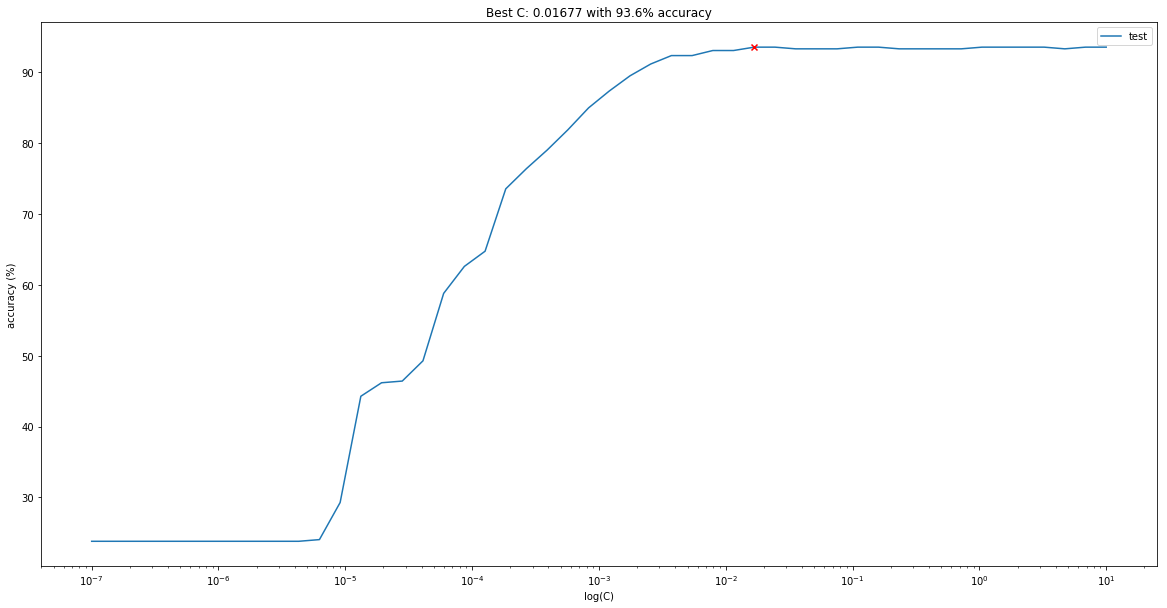

In [139]:
# Plot test curve
results_df=results_df.sort_values('param_C', ascending=True)

best_idx=results_df['mean_test_score'].idxmax()


best_C = results_df['param_C'][best_idx]
best_accuracy=results_df['mean_test_score'][best_idx]


C=results_df['param_C']
mean_test=results_df['mean_test_score']


plt.figure(figsize=(20,10))
plt.scatter(best_C, best_accuracy*100, marker='x', c='red', zorder=10)
plt.semilogx(C, mean_test*100, label='test')

plt.title('Best C: {:.5f} with {:.1f}% accuracy'.format(best_C, 100*best_accuracy))
plt.xlabel('log(C)')
plt.ylabel('accuracy (%)')
plt.legend()
plt.show()

In [167]:
proba_df=pd.DataFrame({}, columns=data['class_name'])

idx=[3]
X_feature=X['train'][idx]
X_data=data['train']['data'][idx]
X_filenames=data['train']['filenames'][idx]

for C in [0.00001, 0.0001, 0.001, 0.01, 0.1]:

    # Set C parameters to a range of values
    grid_param={
        'C': [C],
    }

    grid_lr=GridSearchCV(lr, grid_param, cv=CV, refit=True, return_train_score=True, verbose=True, n_jobs=-1, iid=True)

    grid_lr.fit(X['trainX'], y['trainX'])
    
    best_lr=grid_lr.best_estimator_
    
    # proba_df=pd.DataFrame(best_lr.predict_proba(X_feature), columns=data['class_name'])
    proba_df=proba_df.append(pd.DataFrame(best_lr.predict_proba(X_feature), columns=data['class_name']), ignore_index=True)


    
    #proba_df['labels']=X_filenames
    print("Proba using C={}".format(C))
    # print(proba_df)



Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


Proba using C=1e-05
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Proba using C=0.0001
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


Proba using C=0.001
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished


Proba using C=0.01
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished


Proba using C=0.1


In [168]:
proba_df

,bike,car,motorcycle,other,truck,van
0,0.244510,0.230506,0.176403,0.112724,0.147894,0.087963
1,0.292803,0.246214,0.142049,0.103637,0.129588,0.085709
2,0.489020,0.250932,0.053934,0.064562,0.060535,0.081016
3,0.771632,0.129443,0.012009,0.019533,0.010793,0.056590
4,0.944976,0.033329,0.001438,0.002841,0.000851,0.016564
